In [ ]:
#
# Decision Tree Classifier
#

In [2]:
#Imports
import math
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [3]:
data=pd.read_csv('redData.csv')
print("Original Shape: "+str(data.shape))
data.head()

Original Shape: (98053, 16)


,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,readmitted
0,1.318611,-1.946367,0.222483,-2.247148,1.804944,-0.091866,0.177345,-0.350783,0.573144,-0.588881,0.023059,-0.022564,0.005398,-0.115167,0.328072,1
1,-1.352223,-0.203439,-2.722952,-4.785584,3.816106,0.749277,0.646946,1.998590,-5.379202,1.284401,0.123812,-1.178732,-0.016503,0.398325,-0.612002,0
2,1.128180,-1.636815,0.311217,-1.237505,0.448615,-1.120199,-0.409965,-0.725093,0.100102,-0.359836,0.165119,-0.544237,0.032302,0.596777,0.145075,0
3,1.208989,-0.632193,-0.485926,-1.655542,-0.848419,-2.103991,1.482872,1.971369,-0.716307,-1.521296,0.885627,-0.322792,-0.151605,0.501424,-0.347126,0
4,-0.548972,1.222280,-1.675015,0.684040,-0.250509,-2.770368,-1.835961,-0.372825,-0.463743,0.775540,1.378545,0.459773,-0.260340,0.600863,-0.212174,1


In [4]:
#Shuffling Entries
data=data.sample(frac=1).reset_index(drop=True)
#70/30 split into train/test data
train_size=int(np.floor(data.shape[0]*.7))
features=(data.shape[1]-1)
X_train=data.iloc[0:train_size,0:features].reset_index(drop=True)
X_test=data.iloc[train_size:,0:features].reset_index(drop=True)
Y_train=data.iloc[0:train_size,features].reset_index(drop=True).astype('int64')
Y_test=data.iloc[train_size:,features].reset_index(drop=True).astype('int64')

clf=DecisionTreeClassifier()
clf=clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
del train_size,features,X_test,X_train,Y_train,clf

Accuracy: 0.5278759858580364


0    15630
1    13786
Name: readmitted, dtype: int64


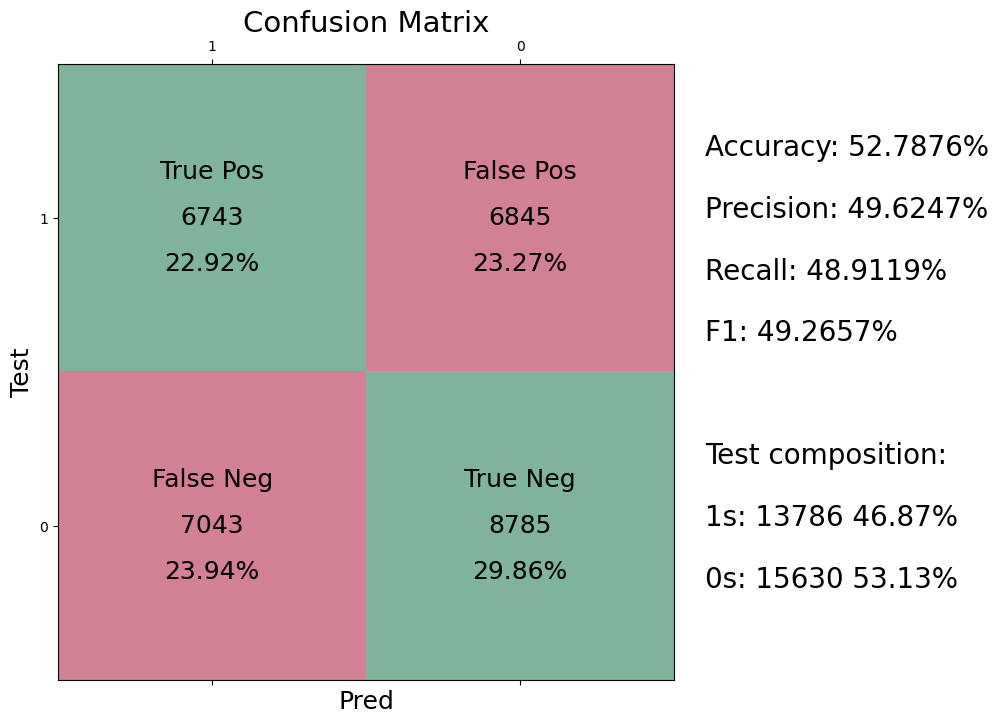

In [16]:
#Testing
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#Getting confusion matrix
tn,fp,fn,tp=confusion_matrix(Y_test,Y_pred).ravel()
tot=tn+fp+fn+tp
#Structure of plot
cm=np.array(((1,0),(0,1)))
fig,ax=plt.subplots(figsize=(8,8))
plt.xlabel('Pred', fontsize=18)
plt.ylabel('Test', fontsize=18)
plt.title('Confusion Matrix', fontsize=21)
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['1','0'])
ax.set_yticklabels(['1','0'])
ax.matshow(cm,cmap='RdYlGn',alpha=0.5)
#Numeric vals
ax.text(0,0,s=tp,va='center',ha='center',fontsize=18)
ax.text(1,0,s=fp,va='center',ha='center',fontsize=18)
ax.text(0,1,s=fn,va='center',ha='center',fontsize=18)
ax.text(1,1,s=tn,va='center',ha='center',fontsize=18)
#Labels
ax.text(0,-.15,s="True Pos",va='center',ha='center',fontsize=18)
ax.text(1,-.15,s="False Pos",va='center',ha='center',fontsize=18)
ax.text(0,.85,s="False Neg",va='center',ha='center',fontsize=18)
ax.text(1,.85,s="True Neg",va='center',ha='center',fontsize=18)
#Percentages
ax.text(0,.15,s=str(round((tp/tot)*100,2))+'%' ,va='center',ha='center',fontsize=18)
ax.text(1,.15,s=str(round((fp/tot)*100,2))+'%' ,va='center',ha='center',fontsize=18)
ax.text(0,1.15,s=str(round((fn/tot)*100,2))+'%' ,va='center',ha='center',fontsize=18)
ax.text(1,1.15,s=str(round((tn/tot)*100,2))+'%' ,va='center',ha='center',fontsize=18)
#Result overview
acc=(tp+tn)/(tp+tn+fp+fn)
pre=(tp)/(tp+fp)
rec=(tp)/(tp+fn)
ax.text(1.6,-.2,"Accuracy: "+str(round((acc)*100 ,4))+'%',fontsize=20)
ax.text(1.6,0,"Precision: "+str(round((pre)*100 ,4))+'%',fontsize=20)
ax.text(1.6,.2,"Recall: "+str(round((rec)*100 ,4))+'%',fontsize=20)
ax.text(1.6,.4,"F1: "+str(round(( 2*((pre*rec)/(pre+rec)) )*100 ,4))+'%',fontsize=20)
c=Y_test.value_counts()
print(c)
t1=c[1]
t0=c[0]
ax.text(1.6,.8,"Test composition:",fontsize=20)
ax.text(1.6,1,"1s: "+str(t1)+" "+str(round((t1/(t1+t0))*100 ,2))+'%',fontsize=20)
ax.text(1.6,1.2,"0s: "+str(t0)+" "+str(round((t0/(t1+t0))*100 ,2))+'%',fontsize=20)
del acc,ax,cm,fig,fn,fp,pre,rec,tn,tot,tp
plt.show()